# Question 1: Topic Modeling

In [1]:
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np
import codecs
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importing required modules 
# specifying the zip file name 
data = "Assignment four data Yelp (question 1 and 2).zip"
  
# opening the zip file in READ mode 
with ZipFile(data, 'r') as zip: 
      
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

In [2]:
foldername = 'Assignment four data Yelp (question 1 and 2)'
columns = ['review_id', 'business_id', 'user_id', 'text', 'date', 'useful', 'cool', 'funny', 'stars']
d = {key : [] for key in columns}
for filename in os.listdir(os.path.join(os.getcwd(), foldername)):
    with codecs.open(os.path.join(os.getcwd(), foldername, filename), 'r',
                     encoding='utf-8', errors='ignore') as f:
        data = pd.read_json(f)
        for column in data.columns:
            d[column].append(data[column].values)

In [3]:
for key, value in d.items():
    d[key] = np.array(value).flatten()
yelp = pd.DataFrame(d)

In [4]:
yelp.head()

,review_id,business_id,user_id,text,date,useful,cool,funny,stars
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,OwjRMXRC0KyPrIlcjaXeFQ,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,5,0,0,2
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,nIJD_7ZXHq-FX8byPMOkMQ,I am actually horrified this place is still in...,2013-12-07 03:16:52,1,0,1,1
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,V34qejxNsCbcgD8C0HVk-Q,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,1,0,0,5
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,ofKDkJKXSKZXu5xJNGiiBQ,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,0,0,0,1
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,UgMW8bLE0QMJDCkQ1Ax5Mg,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,0,0,0,4


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    500000 non-null  object        
 1   business_id  500000 non-null  object        
 2   user_id      500000 non-null  object        
 3   text         500000 non-null  object        
 4   date         500000 non-null  datetime64[ns]
 5   useful       500000 non-null  int64         
 6   cool         500000 non-null  int64         
 7   funny        500000 non-null  int64         
 8   stars        500000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 34.3+ MB


In [6]:
yelp.describe()

,useful,cool,funny,stars
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.134950,0.466564,0.384414,3.744078
std,2.424665,1.495180,1.371608,1.442170
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,4.000000
75%,1.000000,0.000000,0.000000,5.000000
max,151.000000,99.000000,93.000000,5.000000


In [7]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,review_id,business_id,user_id,text,date,useful,cool,funny,stars,text length
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,OwjRMXRC0KyPrIlcjaXeFQ,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,5,0,0,2,1373
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,nIJD_7ZXHq-FX8byPMOkMQ,I am actually horrified this place is still in...,2013-12-07 03:16:52,1,0,1,1,1407
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,V34qejxNsCbcgD8C0HVk-Q,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,1,0,0,5,431
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,ofKDkJKXSKZXu5xJNGiiBQ,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,0,0,0,1,401
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,UgMW8bLE0QMJDCkQ1Ax5Mg,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,0,0,0,4,841


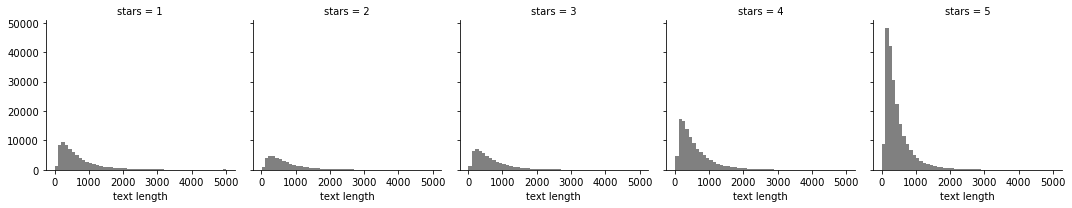

In [8]:
graph = sns.FacetGrid(data=yelp,col='stars')
graph.map(plt.hist,'text length',bins=50,color='gray')
plt.tight_layout()
plt.show()

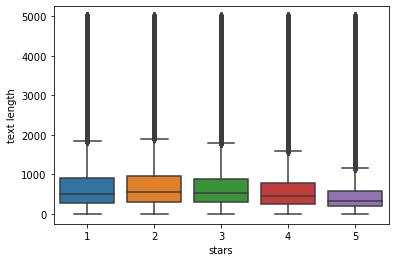

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp)
plt.show()

In [10]:
stars = yelp.groupby('stars').mean()
stars.corr()

,useful,cool,funny,text length
useful,1.000000,-0.777701,0.830127,0.771346
cool,-0.777701,1.000000,-0.492541,-0.506086
funny,0.830127,-0.492541,1.000000,0.986781
text length,0.771346,-0.506086,0.986781,1.000000


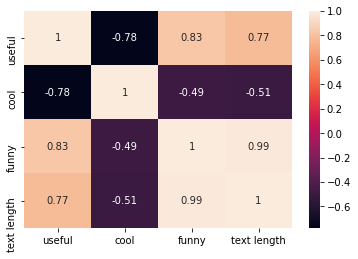

In [11]:
sns.heatmap(data=stars.corr(), annot=True)
plt.show()

In [12]:
pos_reviews = yelp.text[yelp.stars>3].values
neg_reviews = yelp.text[yelp.stars<3].values
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  333,177
Negative Reviews:  111,045


In [13]:
# additional stopwords
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object to generate term document counts
tfidf_pos = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_neg = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 20000
random_neg = np.random.choice(neg_reviews, size=num_reviews)
random_pos = np.random.choice(pos_reviews, size=num_reviews)

# Get the vectors
neg_vectors = tfidf_neg.fit_transform(random_neg)
pos_vectors = tfidf_pos.fit_transform(random_pos)

In [15]:
# Store TFIDF vectors in a Pandas DataFrame to investigate further
neg_df = pd.DataFrame(neg_vectors.todense(), columns=[tfidf_neg.get_feature_names()])
pos_df = pd.DataFrame(pos_vectors.todense(), columns=[tfidf_pos.get_feature_names()])

# get mean for each column (word): highest means are most important words
col_means_neg = {}
for col in neg_df:
    col_means_neg[col] = neg_df[col].mean()

col_means_pos = {}
for col in pos_df:
    col_means_pos[col] = pos_df[col].mean()

In [16]:
no_top_words = 8

print('Top %d words in POSITIVE reviews:' %no_top_words, end='')
print(sorted(col_means_pos, key=col_means_pos.get, reverse=True)[:no_top_words])

print('Top %d words in NEGATIVE reviews:' %no_top_words, end='')
print(sorted(col_means_neg, key=col_means_neg.get, reverse=True)[:no_top_words])

Top 8 words in POSITIVE reviews:[('great',), ('food',), ('place',), ('good',), ('service',), ('time',), ('love',), ('best',)]
Top 8 words in NEGATIVE reviews:[('food',), ('service',), ('place',), ('just',), ('time',), ('like',), ('good',), ('order',)]


# LSA

In [17]:
# import sys
# !{sys.executable} -m pip install gensim

In [17]:
from gensim import corpora, models, similarities, matutils

# Convert sparse matrix of counts to a gensim corpus
# Need to transpose it for gensim which wants terms by docs instead of docs by terms
tfidf_pos_corpus = matutils.Sparse2Corpus(pos_vectors.transpose())
tfidf_neg_corpus = matutils.Sparse2Corpus(neg_vectors.transpose())

# Row indices
id2word_pos = dict((v,k) for k,v in tfidf_pos.vocabulary_.items())
id2word_neg = dict((v,k) for k,v in tfidf_neg.vocabulary_.items())

# This is a hack for Python 3!
id2word_pos = corpora.Dictionary.from_corpus(tfidf_pos_corpus, id2word=id2word_pos)
id2word_neg = corpora.Dictionary.from_corpus(tfidf_neg_corpus, id2word=id2word_neg)

# create LSA model
num_topics = 20
lsi_pos = models.LsiModel(tfidf_pos_corpus, id2word=id2word_pos, num_topics=num_topics)
lsi_neg = models.LsiModel(tfidf_neg_corpus, id2word=id2word_neg, num_topics=num_topics)

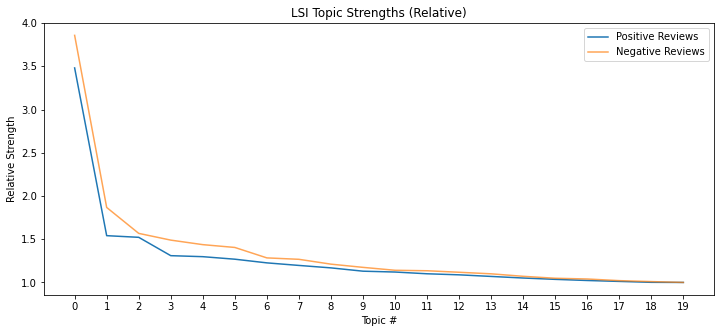

In [18]:
# elbow plot
singular_values_pos = lsi_pos.projection.s.tolist()
singular_values_pos_rel = [sv/singular_values_pos[-1] for sv in singular_values_pos]
singular_values_neg = lsi_neg.projection.s.tolist()
singular_values_neg_rel = [sv/singular_values_neg[-1] for sv in singular_values_neg]

plt.figure(figsize=(12,5))
plt.plot(range(len(singular_values_pos)), singular_values_pos_rel, label='Positive Reviews', alpha=1.0)
plt.plot(range(len(singular_values_neg)), singular_values_neg_rel, label='Negative Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_pos)), range(len(singular_values_pos)))
plt.xlabel('Topic #')
plt.ylabel('Relative Strength')
plt.title('LSI Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

In [19]:
from pprint import pprint
topics_to_print = 20

In [20]:
print('Top %d topics for POSITIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_pos.show_topics()[0:topics_to_print])

Top 20 topics for POSITIVE reviews
---------------------------------
[(0,
  '0.267*"great" + 0.257*"food" + 0.226*"place" + 0.222*"good" + '
  '0.183*"service" + 0.138*"time" + 0.126*"really" + 0.124*"love" + '
  '0.119*"friendly" + 0.117*"like"'),
 (1,
  '0.560*"great" + 0.222*"service" + -0.213*"good" + -0.162*"chicken" + '
  '0.160*"friendly" + 0.149*"staff" + 0.140*"food" + -0.126*"ordered" + '
  '-0.120*"like" + -0.110*"sauce"'),
 (2,
  '-0.469*"food" + -0.205*"good" + -0.192*"great" + -0.178*"service" + '
  '0.158*"time" + 0.128*"hair" + -0.124*"chicken" + -0.121*"delicious" + '
  '0.114*"did" + 0.114*"work"'),
 (3,
  '0.526*"love" + 0.398*"place" + 0.395*"pizza" + -0.180*"service" + '
  '0.167*"sushi" + 0.153*"best" + -0.149*"good" + -0.134*"food" + '
  '0.108*"favorite" + -0.103*"got"'),
 (4,
  '-0.777*"pizza" + -0.238*"great" + 0.217*"love" + 0.190*"sushi" + '
  '0.181*"place" + -0.146*"good" + -0.126*"crust" + 0.100*"food" + '
  '-0.099*"service" + 0.091*"staff"'),
 (5,
  '-0

In [21]:
print('Top %d topics for NEGATIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_neg.show_topics()[0:topics_to_print])

Top 20 topics for NEGATIVE reviews
---------------------------------
[(0,
  '0.248*"food" + 0.180*"service" + 0.171*"place" + 0.156*"just" + '
  '0.152*"time" + 0.146*"good" + 0.142*"like" + 0.138*"order" + '
  '0.118*"minutes" + 0.113*"got"'),
 (1,
  '-0.367*"food" + -0.202*"chicken" + 0.197*"car" + 0.177*"room" + '
  '0.161*"told" + -0.159*"good" + -0.148*"ordered" + 0.142*"called" + '
  '0.135*"customer" + 0.129*"said"'),
 (2,
  '0.320*"minutes" + 0.307*"order" + -0.261*"room" + 0.210*"food" + '
  '0.207*"service" + -0.175*"like" + 0.168*"waited" + -0.167*"hotel" + '
  '-0.138*"place" + 0.135*"table"'),
 (3,
  '-0.695*"pizza" + 0.305*"food" + 0.200*"service" + -0.185*"order" + '
  '0.177*"room" + -0.168*"ordered" + -0.122*"cheese" + 0.118*"hotel" + '
  '-0.118*"chicken" + -0.112*"delivery"'),
 (4,
  '0.490*"room" + 0.286*"hotel" + -0.225*"car" + -0.216*"service" + '
  '0.200*"minutes" + -0.196*"customer" + 0.128*"table" + 0.120*"stay" + '
  '-0.112*"store" + 0.111*"check"'),
 (5,
  

# LDA

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer object to generate term document counts
cv_pos = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

cv_neg = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 15000
cv_random_neg = np.random.choice(neg_reviews, size=num_reviews)
cv_random_pos = np.random.choice(pos_reviews, size=num_reviews)

# Get the cv vectors
cv_neg_vectors = cv_neg.fit_transform(cv_random_neg).transpose()
cv_pos_vectors = cv_pos.fit_transform(cv_random_pos).transpose()

In [23]:
# Convert sparse matrix of counts to a gensim corpus
corpus_neg = matutils.Sparse2Corpus(cv_neg_vectors)
corpus_pos = matutils.Sparse2Corpus(cv_pos_vectors)

# save a mapping (dict) of row id to word (token) for later use by gensim 
id2word_cv_pos = dict((v, k) for k, v in cv_pos.vocabulary_.items())
id2word_cv_neg = dict((v, k) for k, v in cv_neg.vocabulary_.items())

In [24]:
# create lda multicore model
lda_pos = models.ldamulticore.LdaMulticore(corpus=corpus_pos, num_topics=20, 
                                           id2word=id2word_cv_pos, passes=10, workers=15)
lda_neg = models.ldamulticore.LdaMulticore(corpus=corpus_neg, num_topics=20, 
                                           id2word=id2word_cv_neg, passes=10, workers=15)

In [25]:
print('Top topics + words for POSITIVE reviews')
print('-'*39)
pprint(lda_pos.print_topics(num_words=10))

print('\nTop topics + words for NEGATIVE reviews')
print('-'*39)
pprint(lda_neg.print_topics(num_words=10))

Top topics + words for POSITIVE reviews
---------------------------------------
[(0,
  '0.014*"store" + 0.013*"place" + 0.011*"love" + 0.011*"time" + 0.011*"great" '
  '+ 0.010*"friendly" + 0.010*"staff" + 0.010*"like" + 0.008*"don" + '
  '0.007*"just"'),
 (1,
  '0.022*"food" + 0.017*"great" + 0.011*"service" + 0.011*"place" + '
  '0.009*"breakfast" + 0.009*"just" + 0.008*"like" + 0.007*"good" + '
  '0.007*"don" + 0.006*"fresh"'),
 (2,
  '0.030*"place" + 0.016*"just" + 0.014*"sushi" + 0.013*"tea" + 0.013*"good" + '
  '0.009*"like" + 0.008*"definitely" + 0.008*"love" + 0.008*"great" + '
  '0.007*"drink"'),
 (3,
  '0.014*"great" + 0.012*"dr" + 0.010*"time" + 0.009*"staff" + 0.008*"best" + '
  '0.008*"ve" + 0.007*"experience" + 0.007*"office" + 0.006*"just" + '
  '0.006*"visit"'),
 (4,
  '0.019*"hair" + 0.018*"great" + 0.012*"did" + 0.011*"amazing" + 0.010*"time" '
  '+ 0.009*"salon" + 0.009*"job" + 0.009*"massage" + 0.008*"place" + '
  '0.008*"cut"'),
 (5,
  '0.020*"good" + 0.019*"place"

# Question 2: Yelp Review Sentiment Analysis

In [26]:
import string
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
stop_words = stopwords.words('english')

In [27]:
yelp['text_clean'] = yelp.text.apply(
    lambda x: ''.join([char for char in x if char not in string.punctuation]))
yelp['text_clean'] = yelp.text_clean.apply(
    lambda x: ' '.join([w.lower() for w in nltk.tokenize.word_tokenize(x) if w.lower() not in stop_words]))
yelp.head()

,review_id,business_id,user_id,text,date,useful,cool,funny,stars,text length,text_clean
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,OwjRMXRC0KyPrIlcjaXeFQ,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,5,0,0,2,1373,someone worked many museums eager visit galler...
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,nIJD_7ZXHq-FX8byPMOkMQ,I am actually horrified this place is still in...,2013-12-07 03:16:52,1,0,1,1,1407,actually horrified place still business 3 year...
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,V34qejxNsCbcgD8C0HVk-Q,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,1,0,0,5,431,love deagans really atmosphere cozy festive sh...
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,ofKDkJKXSKZXu5xJNGiiBQ,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,0,0,0,1,401,dismal lukewarm defrostedtasting texmex glop m...
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,UgMW8bLE0QMJDCkQ1Ax5Mg,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,0,0,0,4,841,oh happy day finally canes near casa yes other...


In [28]:
yelp = yelp.loc[yelp.stars.isin([1, 3, 5]), :]
display(yelp.shape)

(346621, 11)

In [29]:
x = yelp.text_clean.values
y = yelp.stars.values

In [30]:
vocab = CountVectorizer().fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
print("Getting the words back:")
print(vocab.get_feature_names()[29])
print(vocab.get_feature_names()[33])

231774
actually horrified place still business 3 year old son needed haircut past summer lure 7 kids cut signs got door wait minutes stylists working people decor place total garbage tacky sofa time pleather sofa giant holes son noticed ants crawling floor furniture disgusting walked actually turned around walked upon entering didnt older black male stylist finishes haircut turn tell want 2 clipper around back sides hand cut top standard boys cut really freaking simple right wrong rather use clippers go actually cut hair went using moving downward doesnt cut hair rubs man alleged cosmetology license know use set freaking clippers realized almost immediately idea idea 10 minutes watching guy stumble said know thats fine paid left wanted get scummy joint take son real haircut place bottom line go run way
  (0, 442)	1
  (0, 13674)	3
  (0, 16478)	1
  (0, 16895)	1
  (0, 19341)	1
  (0, 21367)	2
  (0, 24941)	1
  (0, 31702)	1
  (0, 33978)	1
  (0, 34479)	1
  (0, 38002)	1
  (0, 48827)	1
  (0, 48

In [31]:
x = vocab.transform(x)

print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (346621, 231774)
Non-Zero occurences:  15489802
Density of the matrix =  0.019280854599526873


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [33]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[11284  2397   429]
 [ 1516  7677  1909]
 [ 2007  3123 38983]]
Score: 83.58
Classification Report:               precision    recall  f1-score   support

           1       0.76      0.80      0.78     14110
           3       0.58      0.69      0.63     11102
           5       0.94      0.88      0.91     44113

    accuracy                           0.84     69325
   macro avg       0.76      0.79      0.77     69325
weighted avg       0.85      0.84      0.84     69325



In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier(n_jobs=-1)
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[10759   287  3064]
 [ 1167  2068  7867]
 [  382   117 43614]]
Score: 81.42
Classification Report:               precision    recall  f1-score   support

           1       0.87      0.76      0.81     14110
           3       0.84      0.19      0.30     11102
           5       0.80      0.99      0.88     44113

    accuracy                           0.81     69325
   macro avg       0.84      0.65      0.67     69325
weighted avg       0.82      0.81      0.78     69325



In [ ]:
# # Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(x_train,y_train)
# preddt = dt.predict(x_test)
# print("Confusion Matrix for Decision Tree:")
# print(confusion_matrix(y_test,preddt))
# print("Score:",round(accuracy_score(y_test,preddt)*100,2))
# print("Classification Report:",classification_report(y_test,preddt))

In [ ]:
# # Support Vector Machine
# from sklearn.svm import SVC
# svm = SVC(random_state=101)
# svm.fit(x_train,y_train)
# predsvm = svm.predict(x_test)
# print("Confusion Matrix for Support Vector Machines:")
# print(confusion_matrix(y_test,predsvm))
# print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
# print("Classification Report:",classification_report(y_test,predsvm))

In [ ]:
# # Gradient Boosting Classifier
# from sklearn.ensemble import GradientBoostingClassifier
# #Boosting
# gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
# gbi.fit(x_train,y_train)
# predgbi = gbi.predict(x_test)
# print("Confusion Matrix for Gradient Boosting Classifier:")
# print(confusion_matrix(y_test,predgbi))
# print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
# print("Classification Report:",classification_report(y_test,predgbi))

In [ ]:
# # K Nearest Neighbour Algorithm
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_jobs=-1)
# knn.fit(x_train,y_train)
# predknn = knn.predict(x_test)
# print("Confusion Matrix for K Neighbors Classifier:")
# print(confusion_matrix(y_test,predknn))
# print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
# print("Classification Report:")
# print(classification_report(y_test,predknn))

In [ ]:
# # MULTILAYER PERCEPTRON CLASSIFIER
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier()
# mlp.fit(x_train,y_train)
# predmlp = mlp.predict(x_test)
# print("Confusion Matrix for Multilayer Perceptron Classifier:")
# print(confusion_matrix(y_test,predmlp))
# print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
# print("Classification Report:")
# print(classification_report(y_test,predmlp))

# Question 3: House price prediction

In [36]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [37]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [40]:
print("Skewness of the Saleprice target variable is: %f" %train['SalePrice'].skew())
print("Kurtosis of the Saleprice target variable is: %f" %train['SalePrice'].kurt())

Skewness of the Saleprice target variable is: 1.882876
Kurtosis of the Saleprice target variable is: 6.536282


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize']=(10,6)
import warnings
warnings.filterwarnings('ignore')

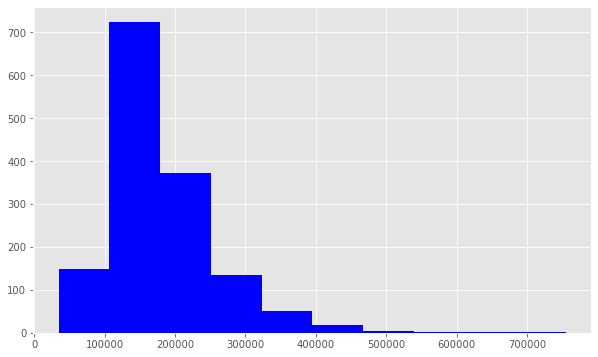

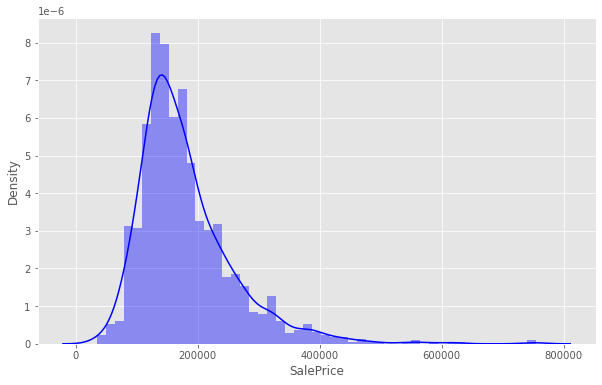

In [45]:
plt.hist(train['SalePrice'],color='blue')
plt.show()
sns.distplot(train['SalePrice'],color='blue')
plt.show()

Skewness of the Saleprice target variable is: 0.121335


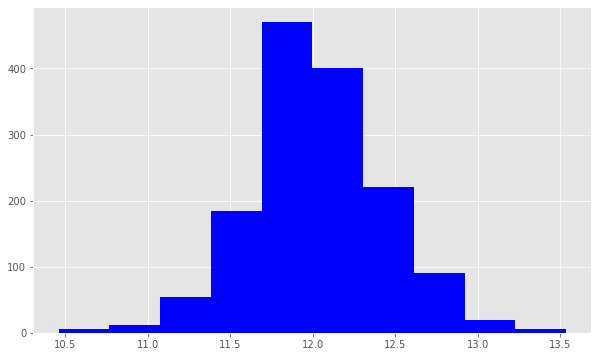

In [46]:
target=np.log(train['SalePrice'])
print("Skewness of the Saleprice target variable is: %f" %target.skew())
plt.hist(target,color="blue")
plt.show()

In [47]:
numeric_features=train.select_dtypes(include=[np.number])
print(numeric_features.dtypes)
print(len(numeric_features.dtypes))

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object
38


In [48]:
objects=train.select_dtypes(exclude=[np.number])
objects.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
print(train['Street'].value_counts())
train['encode_street']=pd.get_dummies(train['Street'],drop_first=True)
test['encode_street']=pd.get_dummies(test['Street'],drop_first=True)
print(train['encode_street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
1    1454
0       6
Name: encode_street, dtype: int64


In [50]:
def encode(x):
    return 1 if x=='Partial' else 0
train['encode_salecondition']=train['SaleCondition'].apply(encode)
test['encode_salecondition']=test['SaleCondition'].apply(encode)

<AxesSubplot:xlabel='encode_salecondition'>

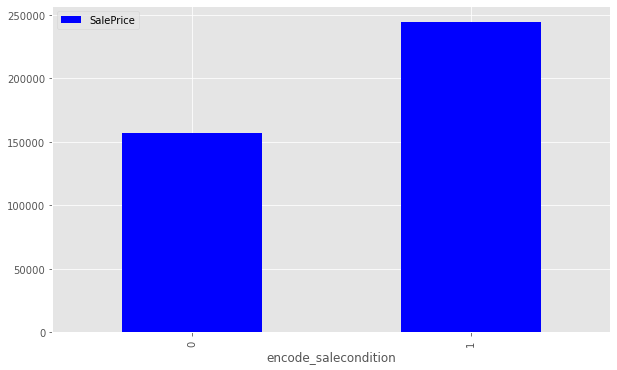

In [51]:
sale_cond_pivot=train.pivot_table(index='encode_salecondition',values='SalePrice',aggfunc=np.median)
sale_cond_pivot.plot(kind='bar',color='blue')

In [52]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [54]:
y=np.log(data['SalePrice'])
X=data.drop(['Id','SalePrice'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
print(lr.score(X_test,y_test))

0.8647463410578131


In [58]:
predictions=lr.predict(X_test)
predictions

array([11.9279834 , 12.613182  , 11.68259543, 12.05987131, 12.63253959,
       11.34017959, 12.36985395, 11.93306706, 11.33361845, 11.8873002 ,
       11.90336699, 11.71321408, 11.32671299, 12.16460468, 12.08187177,
       11.79864133, 12.22721937, 11.74929298, 11.63970466, 12.27110097,
       12.03697898, 12.22741216, 12.12230909, 11.82231934, 12.2132387 ,
       11.86591032, 12.19720539, 11.46528684, 12.07106423, 12.11747771,
       11.67356399, 12.49781739, 12.14008396, 11.55127135, 12.49627395,
       11.94978138, 11.83206113, 12.27481476, 12.76509994, 11.51734167,
       11.83795841, 12.39362526, 11.6256284 , 12.62487596, 11.77115464,
       11.60810673, 11.5989006 , 11.77156953, 12.86446838, 11.68121561,
       11.63786656, 12.2088134 , 11.66507159, 12.70582127, 11.91615344,
       12.33997515, 12.32311651, 11.90244966, 11.93379254, 11.70307523,
       11.33490715, 11.91328669, 12.5678348 , 12.43842297, 12.58908428,
       12.29753883, 11.52421386, 12.71334064, 11.62400915, 11.93

In [59]:
test_data=test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [60]:
pred=lr.predict(test_data)
pred

array([11.68856268, 11.71858472, 12.03237122, ..., 12.05801099,
       11.59342239, 12.38664403])

In [61]:
final_predictions=np.exp(pred)
final_predictions

array([119200.5537467 , 122833.45845104, 168109.56584157, ...,
       172475.58815667, 108382.55137782, 239580.32672689])